In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
car = pd.read_csv('Car data.csv')

car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.shape

(301, 9)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### 결측은 없네요

In [5]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Visualizing

/Users/minyoungxi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sales data distribution')

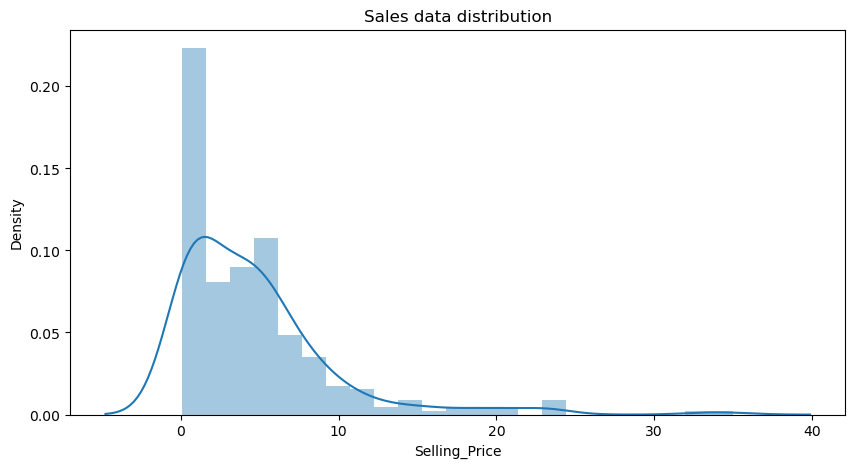

In [6]:
fig = plt.figure(figsize=(10,5))

sns.distplot(car["Selling_Price"])
plt.title("Sales data distribution")

<AxesSubplot:>

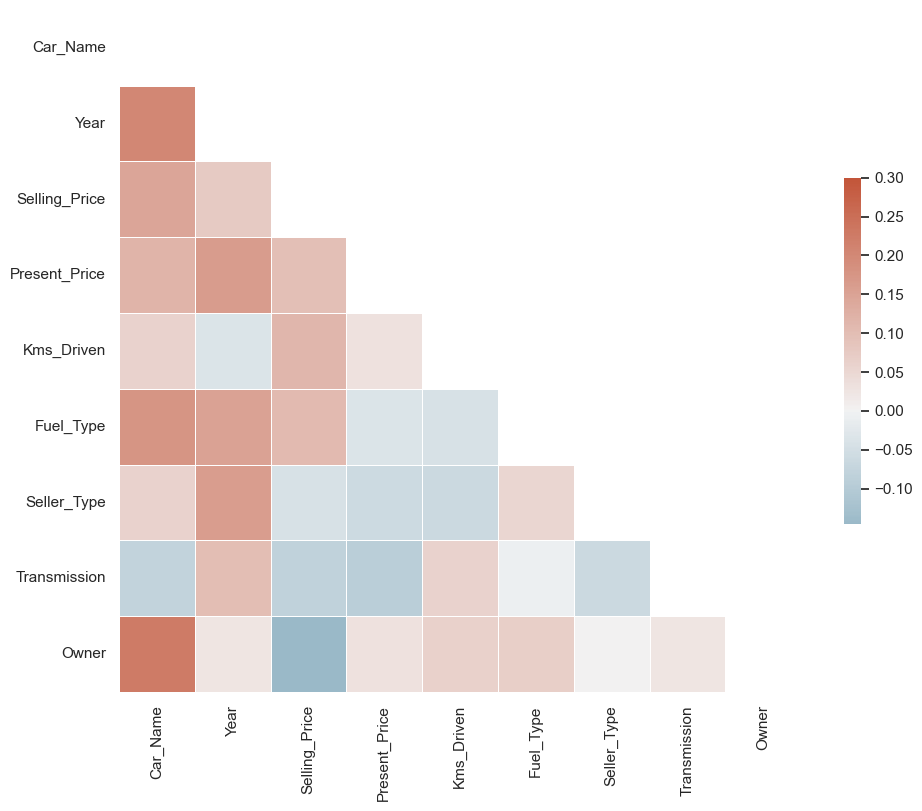

In [7]:
sns.set_theme(style="white")

rs = np.random.RandomState(33)
d = pd.DataFrame(data = rs.normal(size=(100,9)),
                columns=list(car))

corr = d.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink': .5})

#### code 설명 

* numpy의 normal은 정규 분포화 하는 것. 
* numpy의 triu 는 쌍삼각행렬, 위에 보이는 그래프처럼 모양이 만들어짐.
* sns.diverging_palette 는 양쪽으로 발산하는 색을 입힐 때 사용 

## Cleaning the Data 

In [8]:
print(car["Seller_Type"].unique())
print(car["Transmission"].unique())
print(car['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [9]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_dataset = car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [11]:
final_dataset['Current_Year']=2021

In [12]:
final_dataset['no_year']=final_dataset['Current_Year']-final_dataset['Year']

In [13]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
final_dataset.drop(['Year'], axis=1, inplace=True)

In [15]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [16]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [17]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [18]:
print(final_dataset["Fuel_Type"].unique())
print(final_dataset["Seller_Type"].unique())
print(final_dataset["Transmission"].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [19]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [20]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


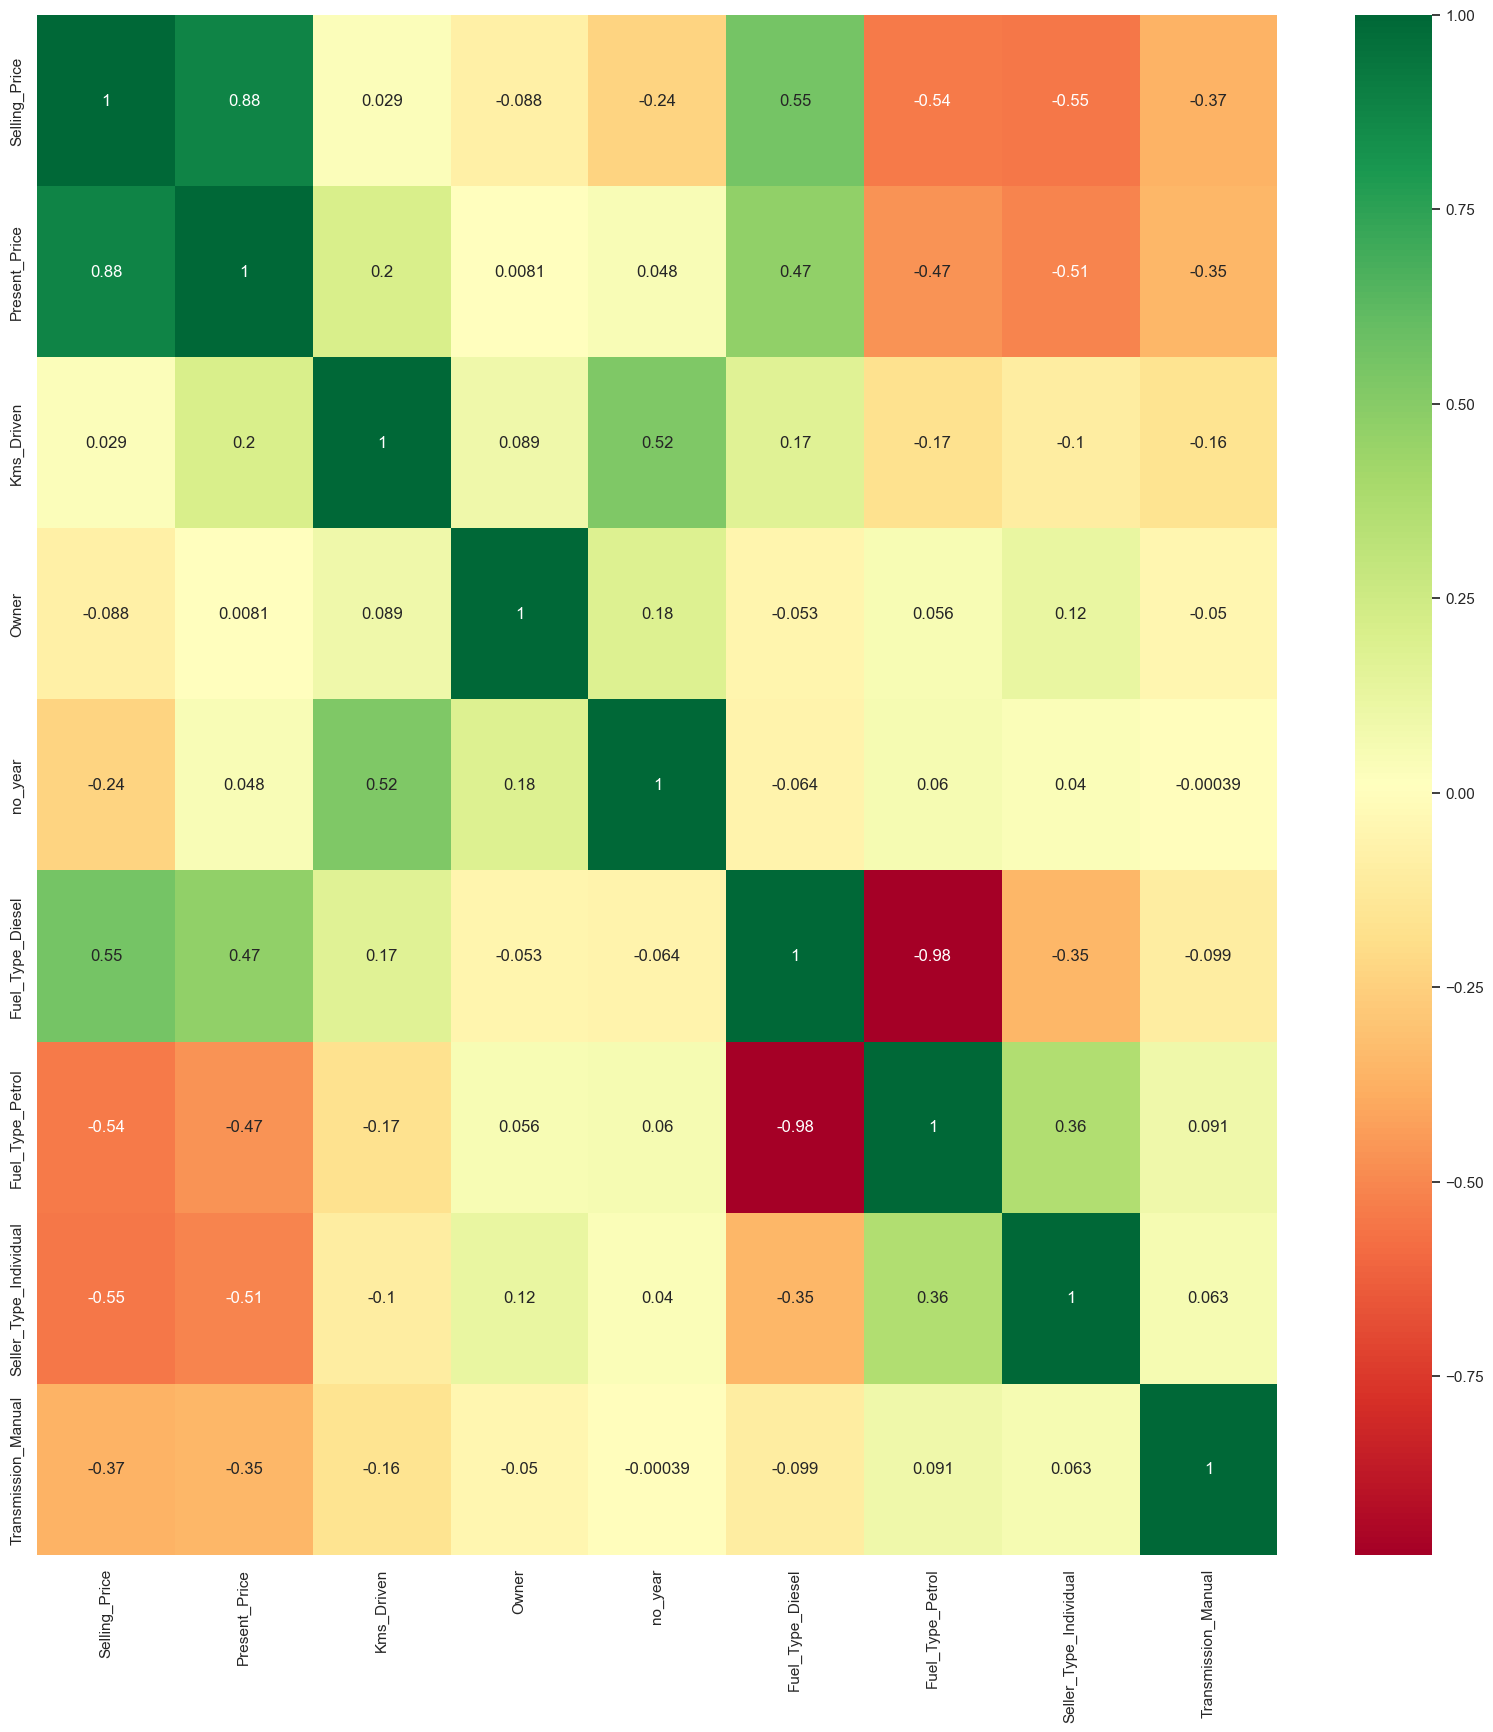

In [21]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
y=final_dataset['Selling_Price']
y.head()


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
X=final_dataset.drop(['Selling_Price'],axis=1)
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [24]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[0.419168   0.04257657 0.00122308 0.07397122 0.20921503 0.01113298
 0.12321087 0.11950226]


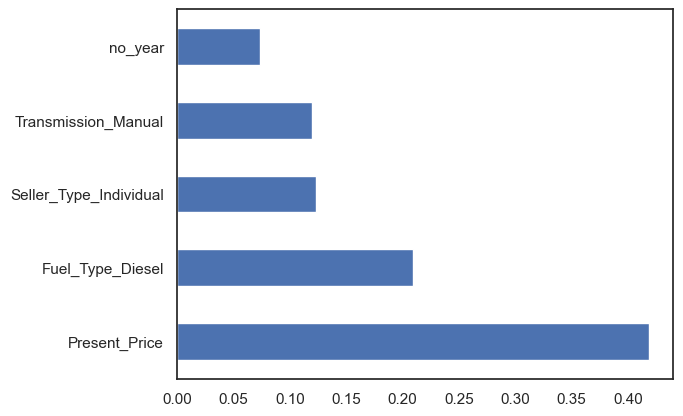

In [26]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [27]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

# Splitting the data

###### 70% 훈련데이터 30% 테스트 데이터
###### 전체 데이터를 X(설명변수) Y(목표변수) 로 나눕니다. 

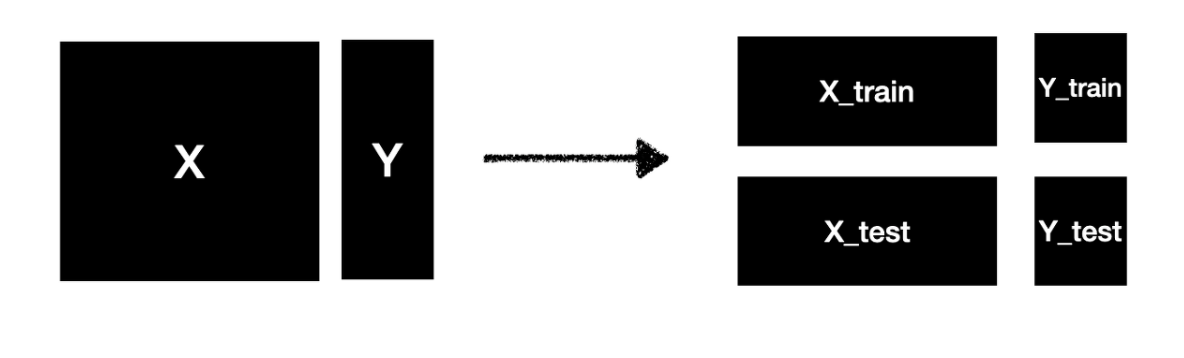

In [29]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.3, random_state=2)

## Building the model

In [30]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

## Finding the accuracy

In [31]:
train_acc = random_forest_regressor.score(X_train, y_train)
test_acc = random_forest_regressor.score(X_test, y_test)

print("Training accuracy : ", round(train_acc*100,2), "%")
print("Test accuracy : ", round(test_acc*100,2), "%")

Training accuracy :  96.81 %
Test accuracy :  67.28 %


## Plotting the graphs

In [33]:
predictions = random_forest_regressor.predict(X_test)
predictions

array([20.3568,  0.5418,  3.951 ,  3.2525, 11.2157,  4.382 ,  3.8125,
        6.0215,  0.3228,  5.38  ,  6.315 ,  4.1225,  0.3251, 10.2406,
        2.49  ,  0.6858,  0.661 ,  0.368 ,  9.606 ,  4.1875,  1.448 ,
        7.1995,  0.3414,  9.6706,  0.5815,  6.8185,  0.5863,  0.2779,
        3.9785,  2.2845,  0.3923,  3.896 ,  6.3465, 10.3039,  0.452 ,
        5.411 ,  7.2696,  5.6215,  6.143 ,  5.279 , 18.7003,  0.7477,
        0.3366,  0.5223,  5.8525,  7.5375,  0.3429,  5.4225, 18.069 ,
        2.453 ,  6.7835,  0.5493,  7.6921,  0.5757,  0.7571,  0.4767,
        0.3381, 22.0815,  0.5524,  0.1977,  7.5604,  7.5375,  2.146 ,
        2.8095,  0.5456,  4.555 ,  2.5115,  1.1691,  0.5593,  0.6014,
        0.5836,  4.1995,  4.6105,  0.5015,  3.9155,  4.2125,  0.3926,
        1.3084,  6.9885,  5.3825,  4.5865,  5.316 ,  3.5815,  5.0835,
        1.1456,  0.529 ,  2.676 ,  1.944 ,  5.3825,  1.1498,  5.75  ,
        7.021 ,  5.386 ,  1.1658, 18.8891,  3.025 ,  5.935 ,  3.455 ,
        3.82  , 22.0

/Users/minyoungxi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

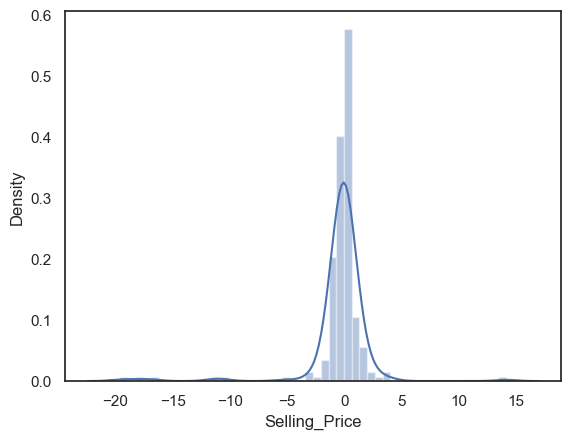

In [34]:
sns.distplot(y_test-predictions)

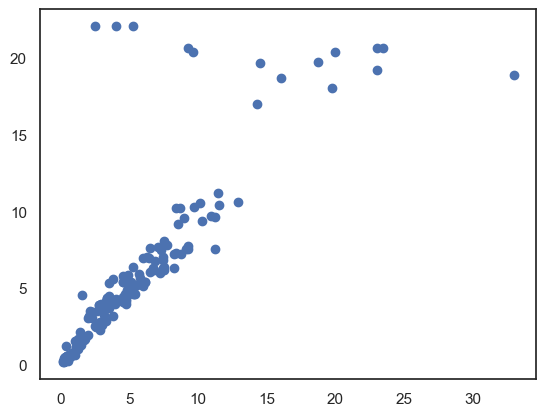

In [36]:
plt.scatter(y_test, predictions)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
linear = LinearRegression()

In [39]:
linear.fit(X_train, y_train)

LinearRegression()

In [43]:
predictions = linear.predict(X_test)

/Users/minyoungxi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

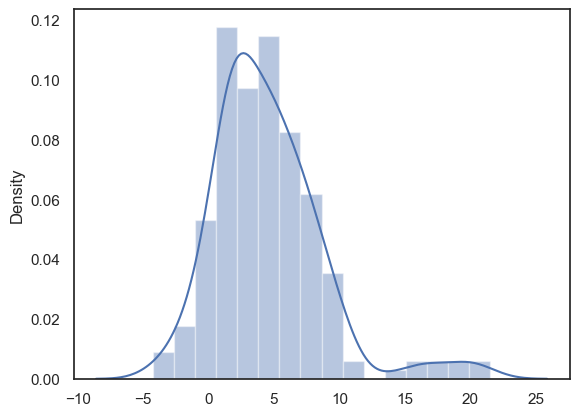

In [45]:
sns.distplot(predictions)